In [1]:
import pandas as pd

df = pd.read_csv("Merged_data.csv")

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
import datetime
from plotly.subplots import make_subplots

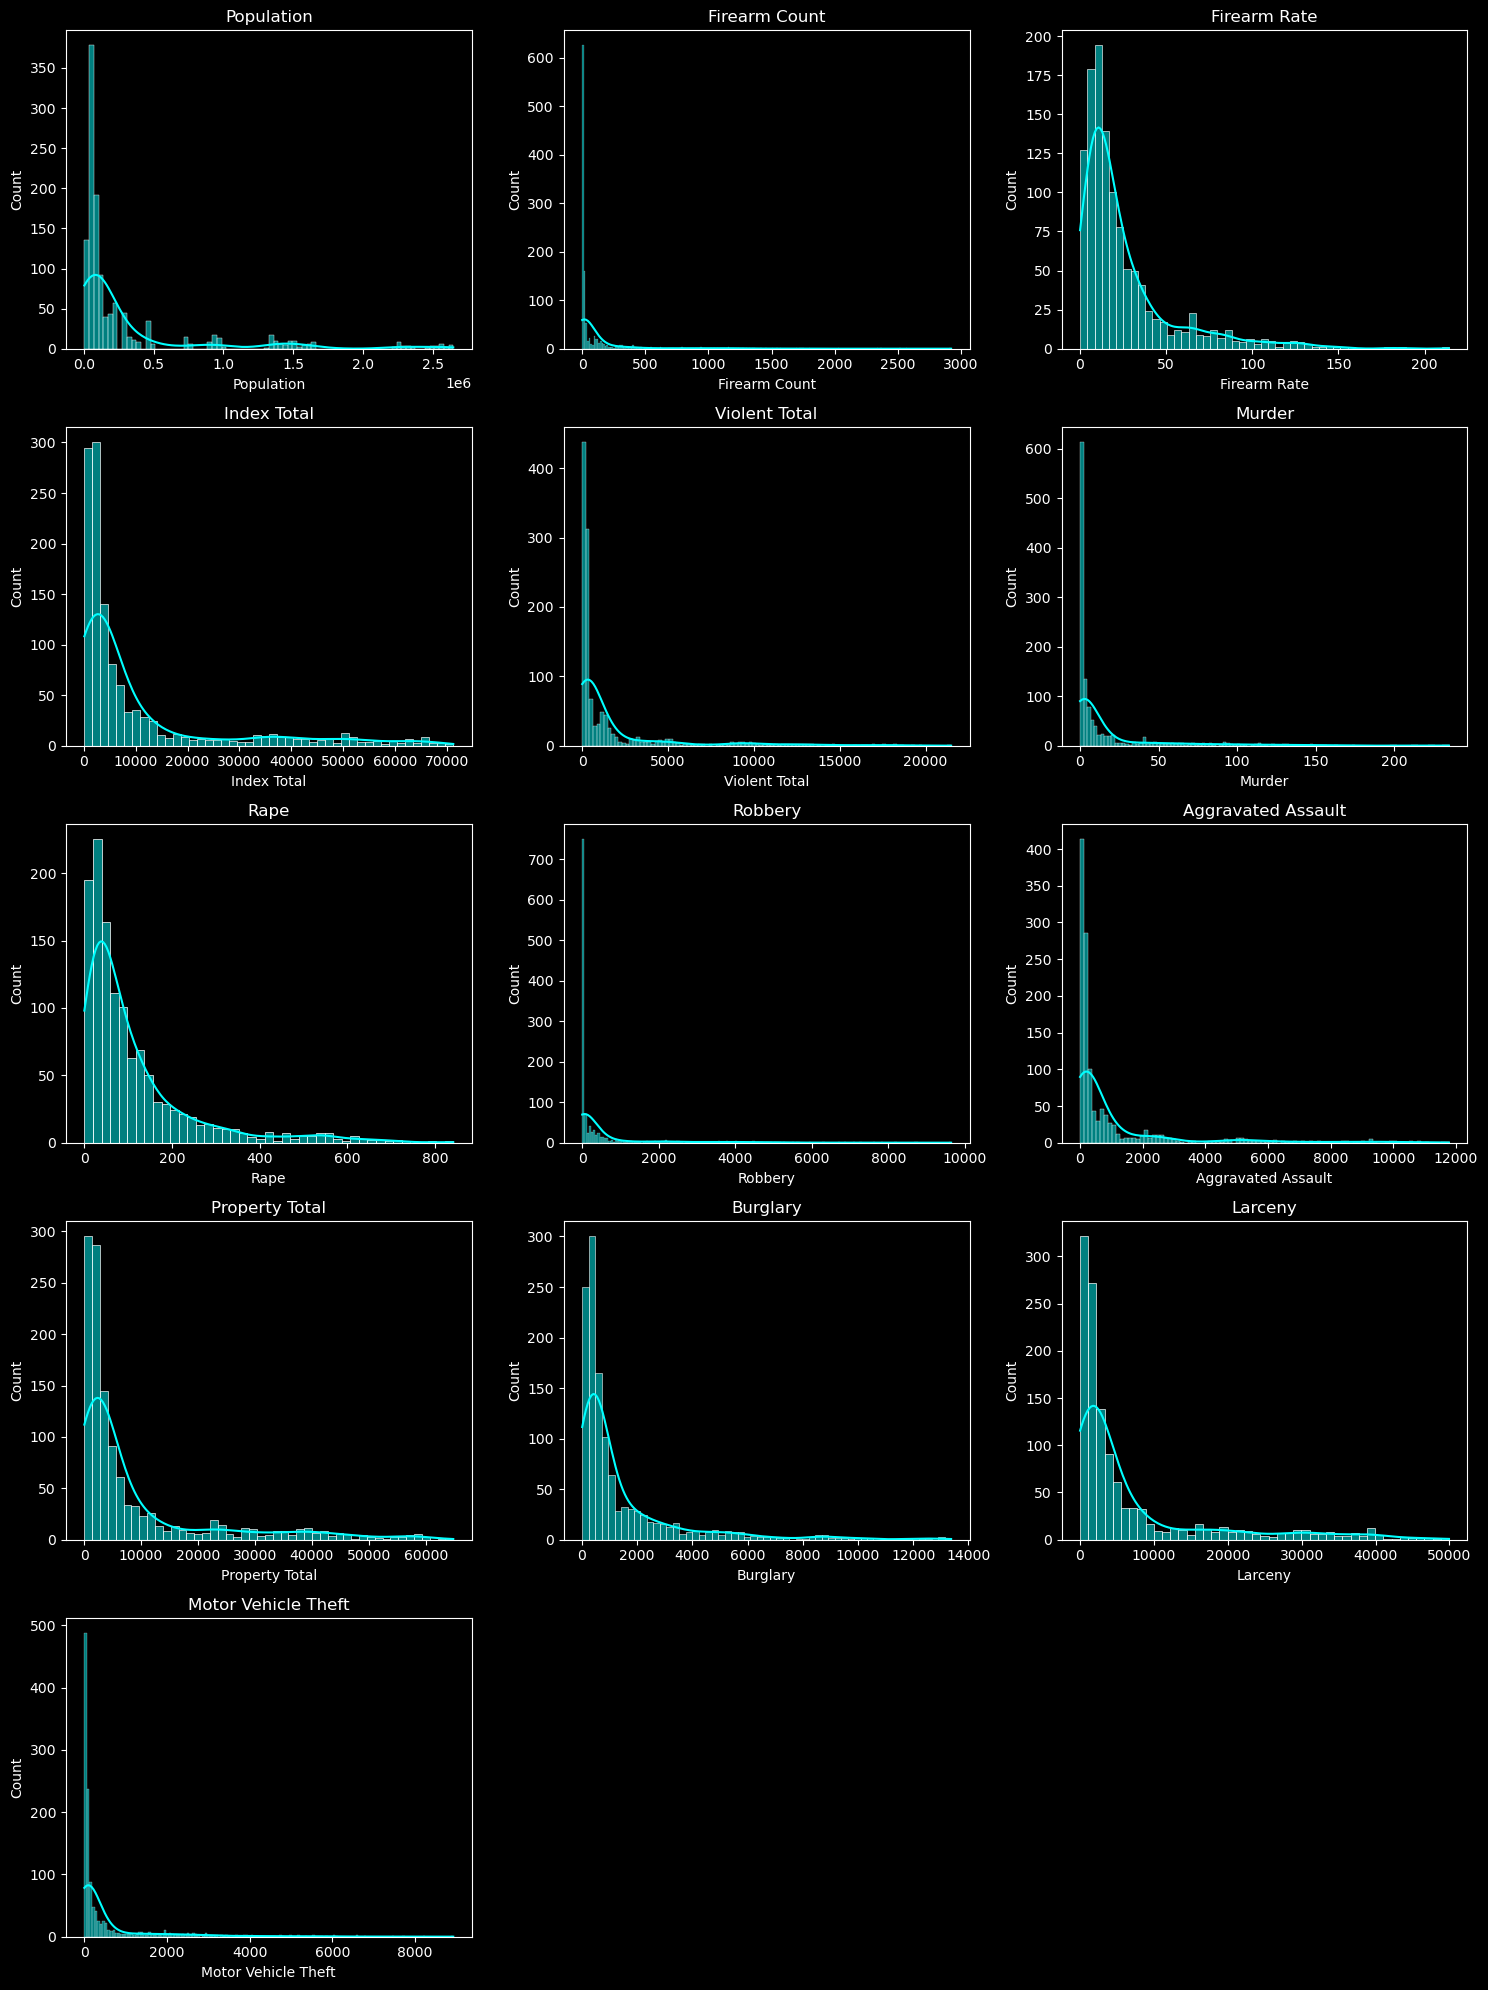

In [3]:
import seaborn as sns


plt.style.use('dark_background')

# Distribution of numerical features
num_cols = ['Population', 'Firearm Count', 'Firearm Rate', 'Index Total', 'Violent Total', 'Murder', 'Rape',
            'Robbery', 'Aggravated Assault', 'Property Total', 'Burglary', 'Larceny', 'Motor Vehicle Theft']
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], kde=True, color='cyan')  
    plt.title(col)
plt.tight_layout()
plt.show()


/Users/kabileshravichandran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


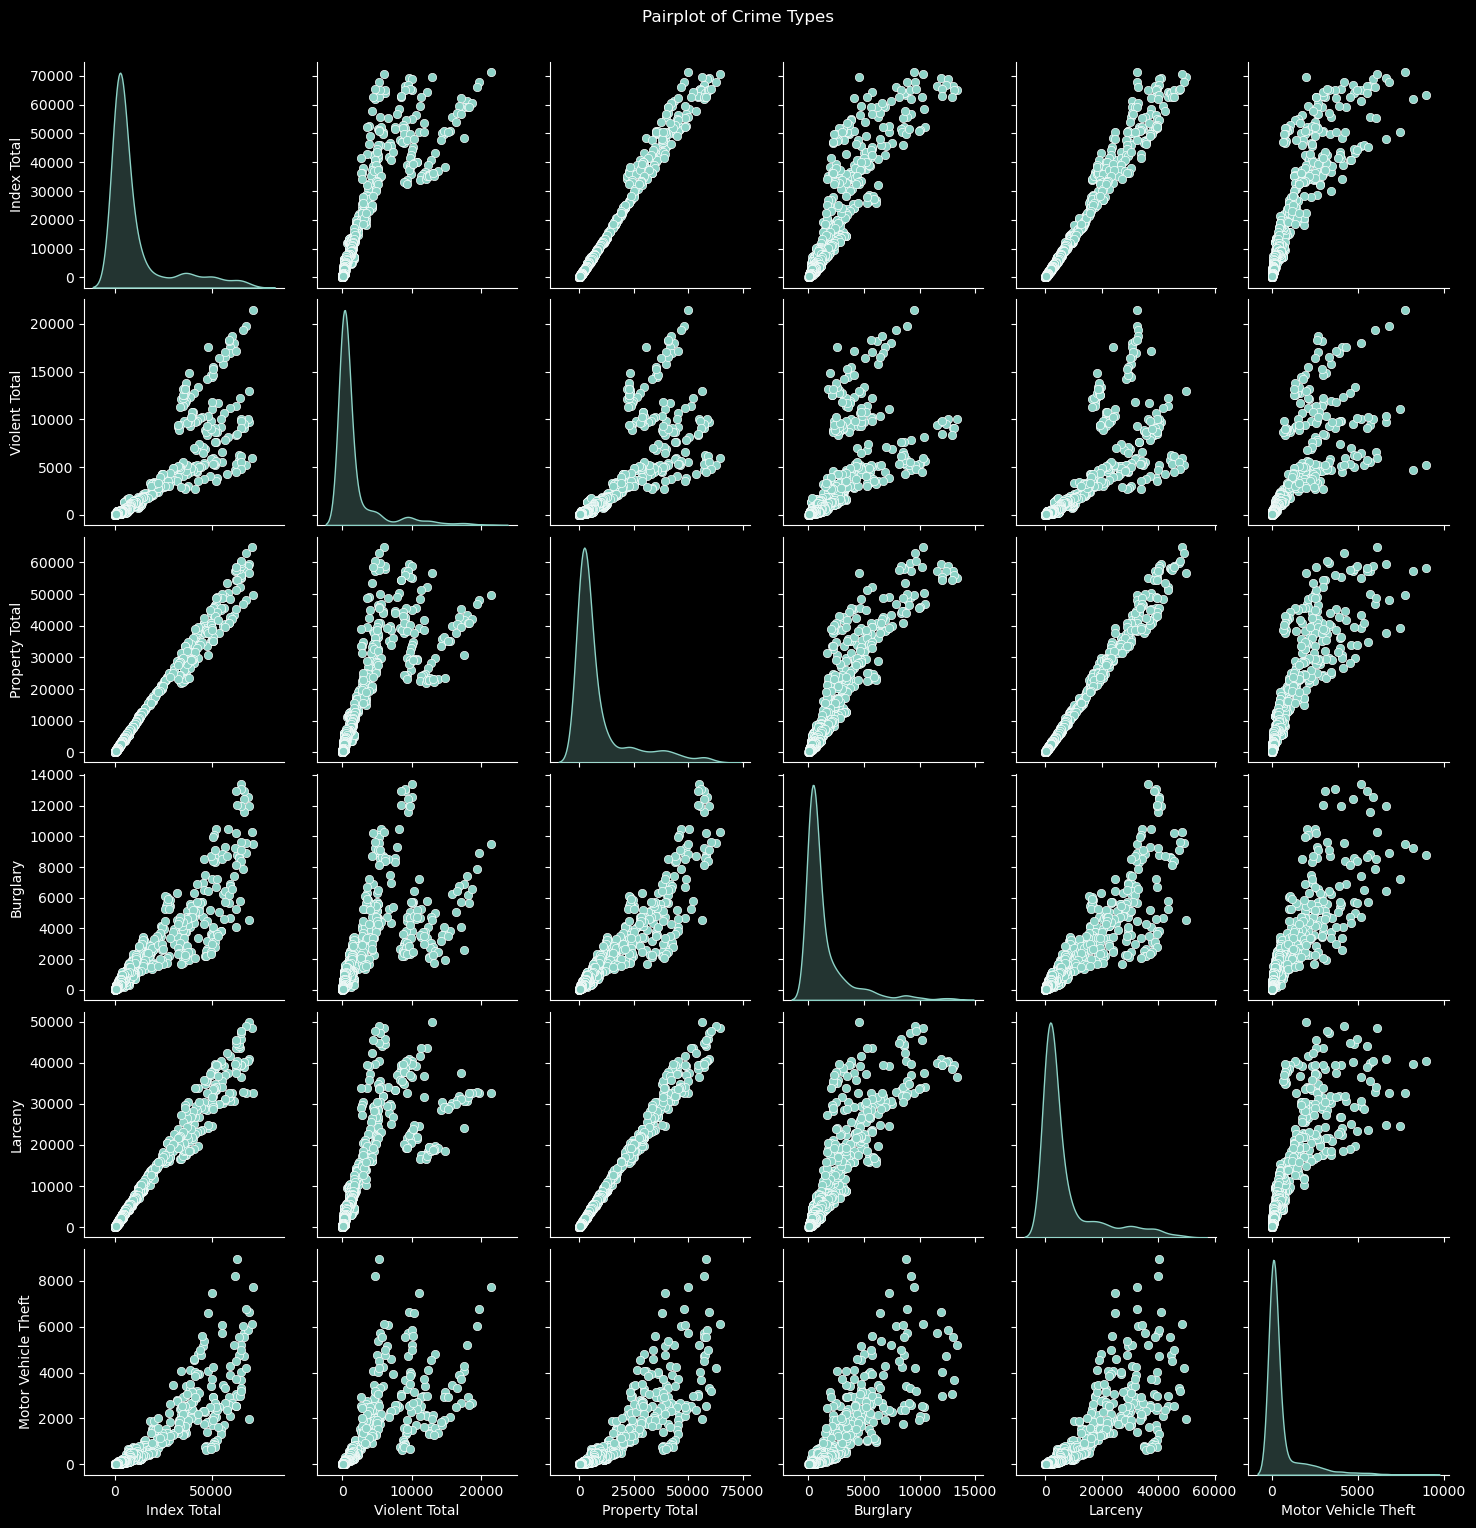

In [4]:

plt.style.use('dark_background')

selected_cols = ['Index Total', 'Violent Total', 'Property Total', 'Burglary', 'Larceny', 'Motor Vehicle Theft']
# Pairplot for selected numerical features
sns.pairplot(df[selected_cols], diag_kind='kde')
plt.suptitle('Pairplot of Crime Types', y=1.02, color='white')  
plt.show()

In [5]:
import pandas as pd
import plotly.express as px



# Scatter plot for Population vs. Index Total colored by Year
fig1 = px.scatter(df, x='Population', y='Index Total', color='Year', title='Population vs. Index Total by Year',
                  hover_name='County', template='plotly_dark')
fig1.update_traces(marker=dict(size=10))
fig1.update_layout(title_font=dict(size=20), title_x=0.5)
fig1.show()

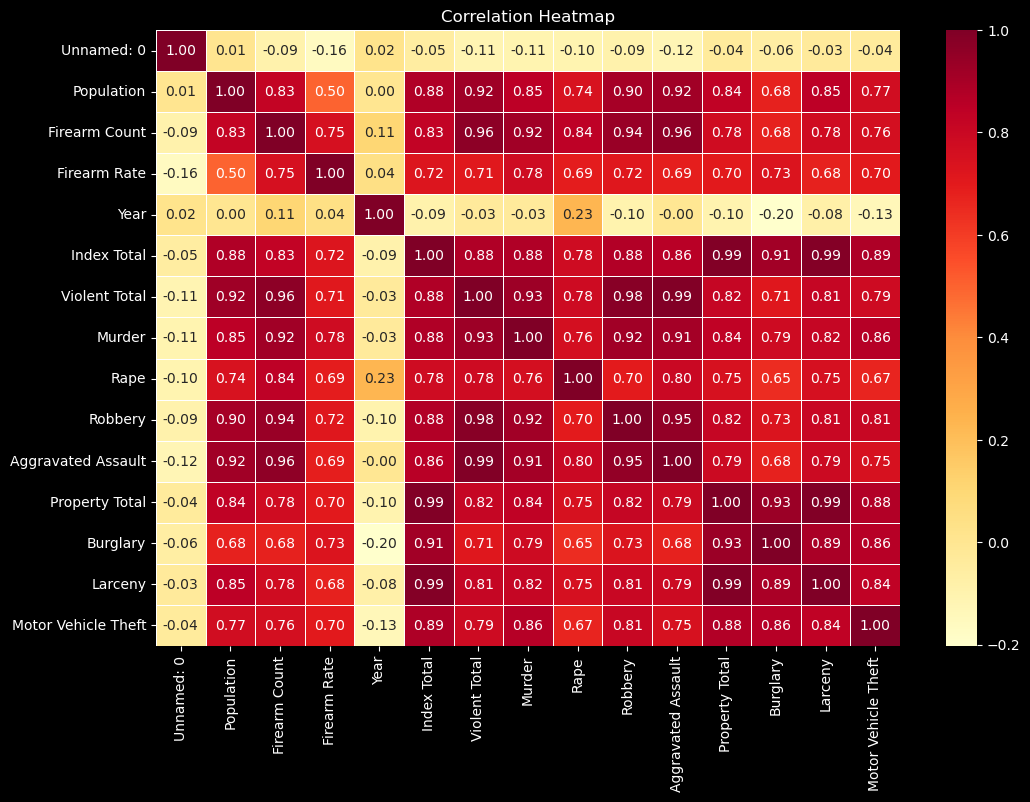

In [6]:


plt.style.use('dark_background')

# Correlation heatmap
corr = df.corr(numeric_only=True)  
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', color='white')  
plt.show()


In [7]:
# Bar plot for Violent Total by County
fig2 = px.bar(df, x='County', y='Index Total', title='Index Total by County', color='Index Total',
              template='plotly_dark')
fig2.update_layout(xaxis_tickangle=-45, title_font=dict(size=20), title_x=0.5)
fig2.show()

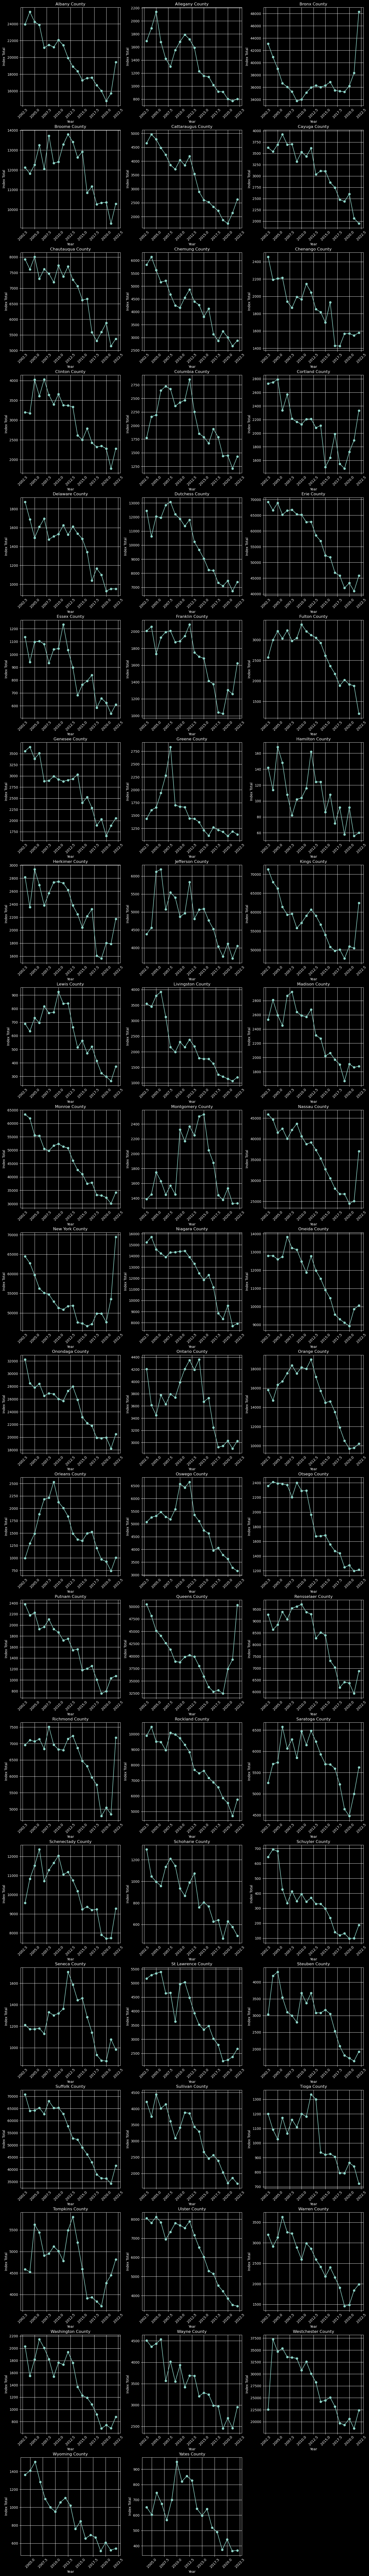

In [8]:
import matplotlib.pyplot as plt
import math

data = df
num_counties = len(data['County'].unique())
plots_per_row = 3
num_rows = math.ceil(num_counties / plots_per_row)
plt.figure(figsize=(15, num_rows * 5))

for i, county in enumerate(data['County'].unique(), 1):
    county_data = data[data['County'] == county].sort_values(by='Year')
    
    plt.subplot(num_rows, plots_per_row, i)
    plt.plot(county_data['Year'], county_data['Index Total'], marker='o', linestyle='-')
    plt.title(f"{county} County")
    plt.xlabel('Year')
    plt.ylabel('Index Total')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
def display_features_by_County(county) :
    county_data = data[data['County'] == county].sort_values(by='Year')
    features = county_data.columns.drop(['County', 'Year'])[1:]
    plots_per_row = 3
    selected_features = features[1:]
    num_features = len(selected_features)
    num_rows = math.ceil(num_features / plots_per_row)

    plt.figure(figsize=(15, num_rows * 3))

    for i, feature in enumerate(selected_features, 1):
        plt.subplot(num_rows, plots_per_row, i)
        plt.plot(county_data['Year'], county_data[feature], marker='o', linestyle='-')
        plt.title(f"{feature}")
        plt.xlabel('Year')
        plt.ylabel(feature)
        plt.xticks(rotation=45)
        plt.grid(True)

    plt.tight_layout() 
    plt.show()

Bronx has a stable level of crimes and has increase in the total index after 2017
Cayuga, Fulton has decreasse in crimes after 2020(COVID year) unlike others
Delaware has stable crime levels even after 2020(COVID year)

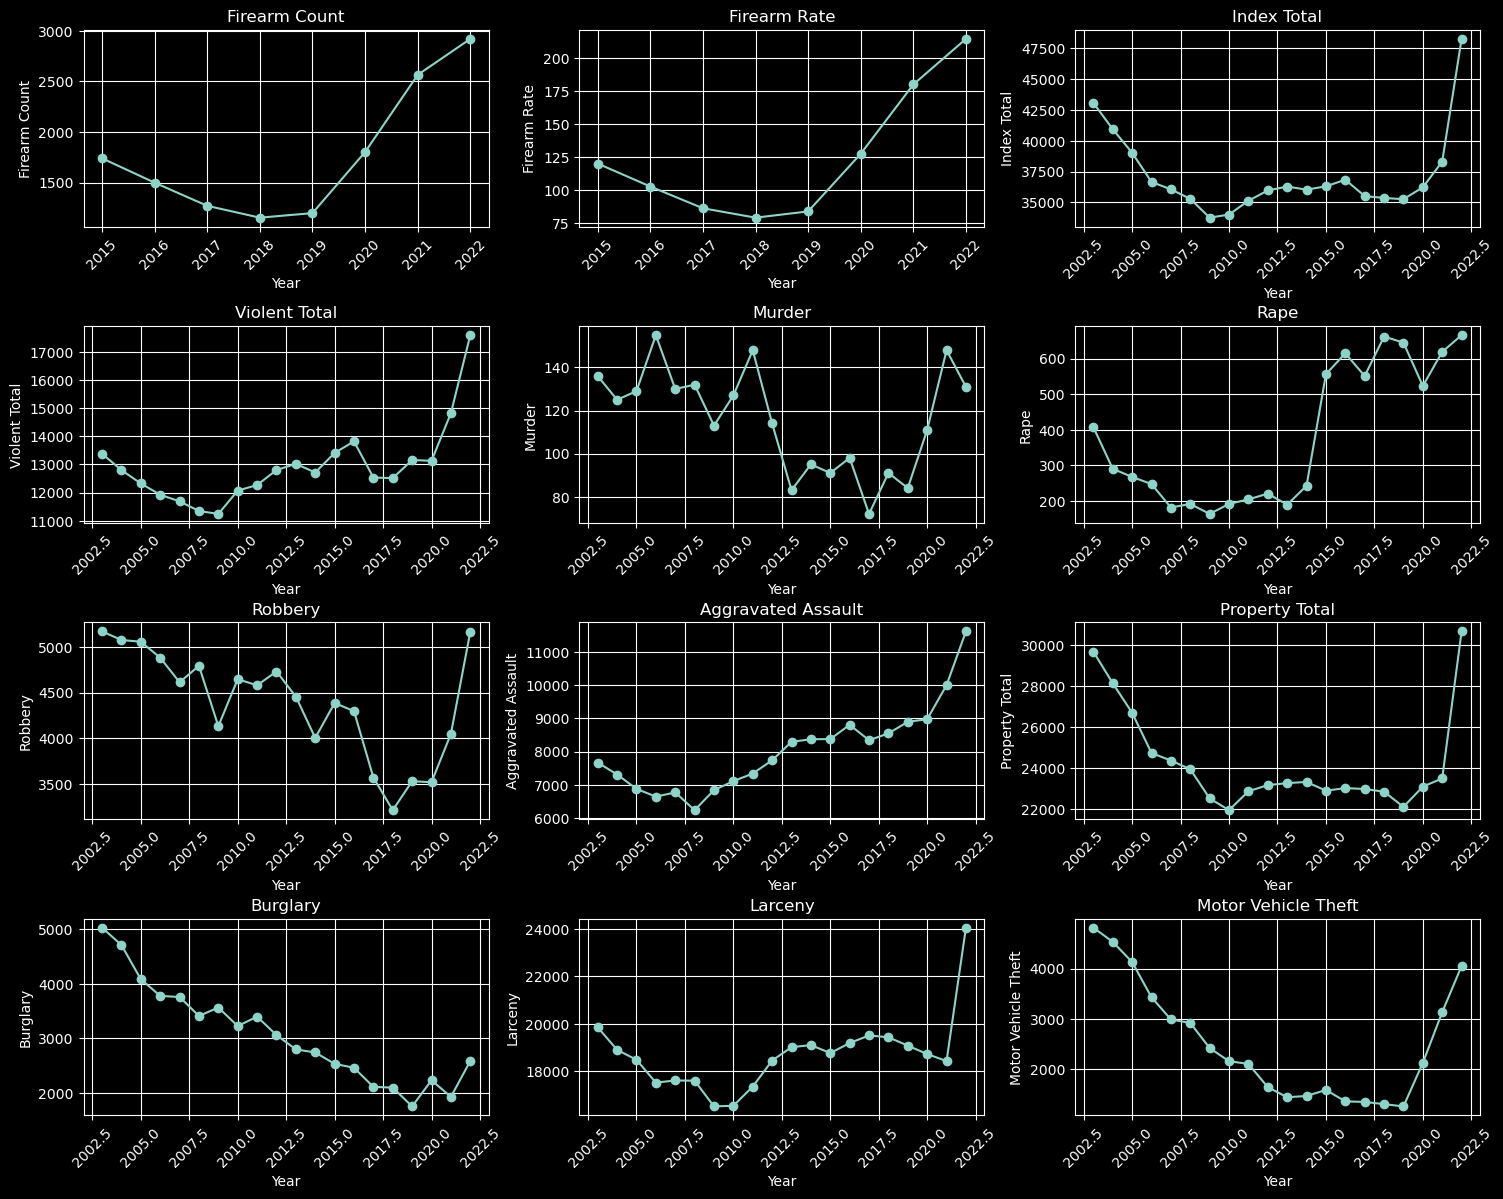

In [12]:
display_features_by_County('Bronx')

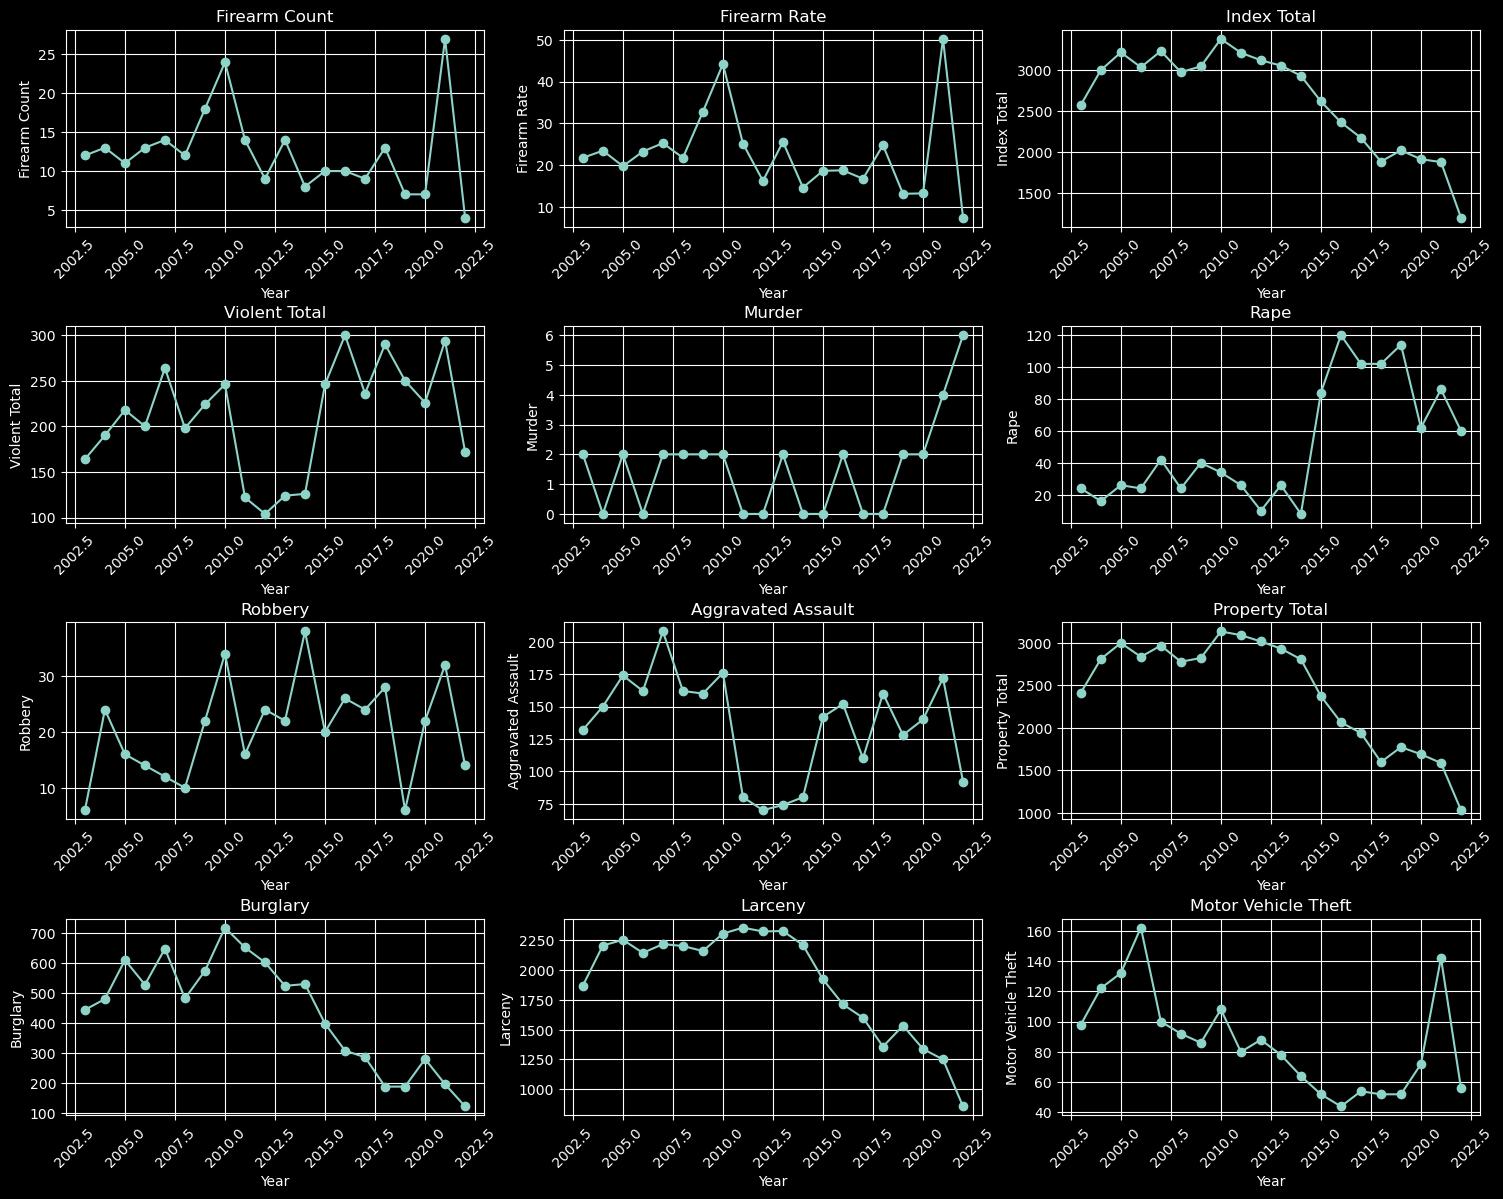

In [13]:
display_features_by_County('Fulton')

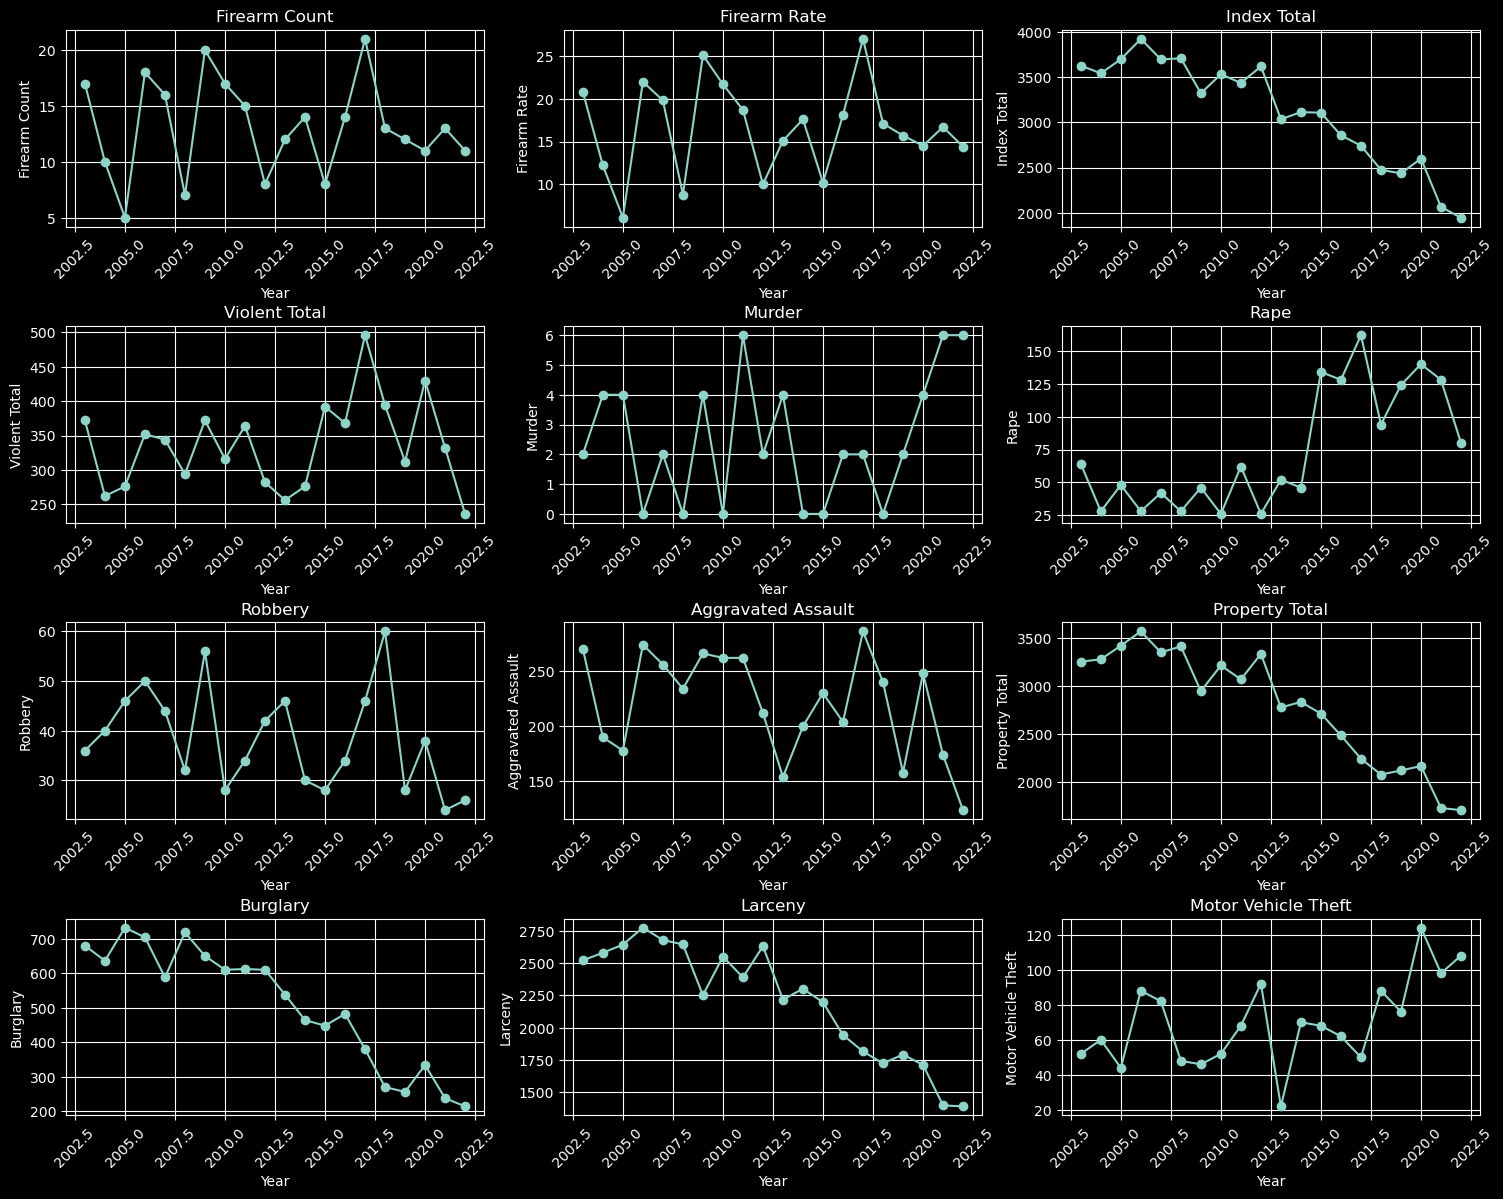

In [14]:
display_features_by_County('Cayuga')

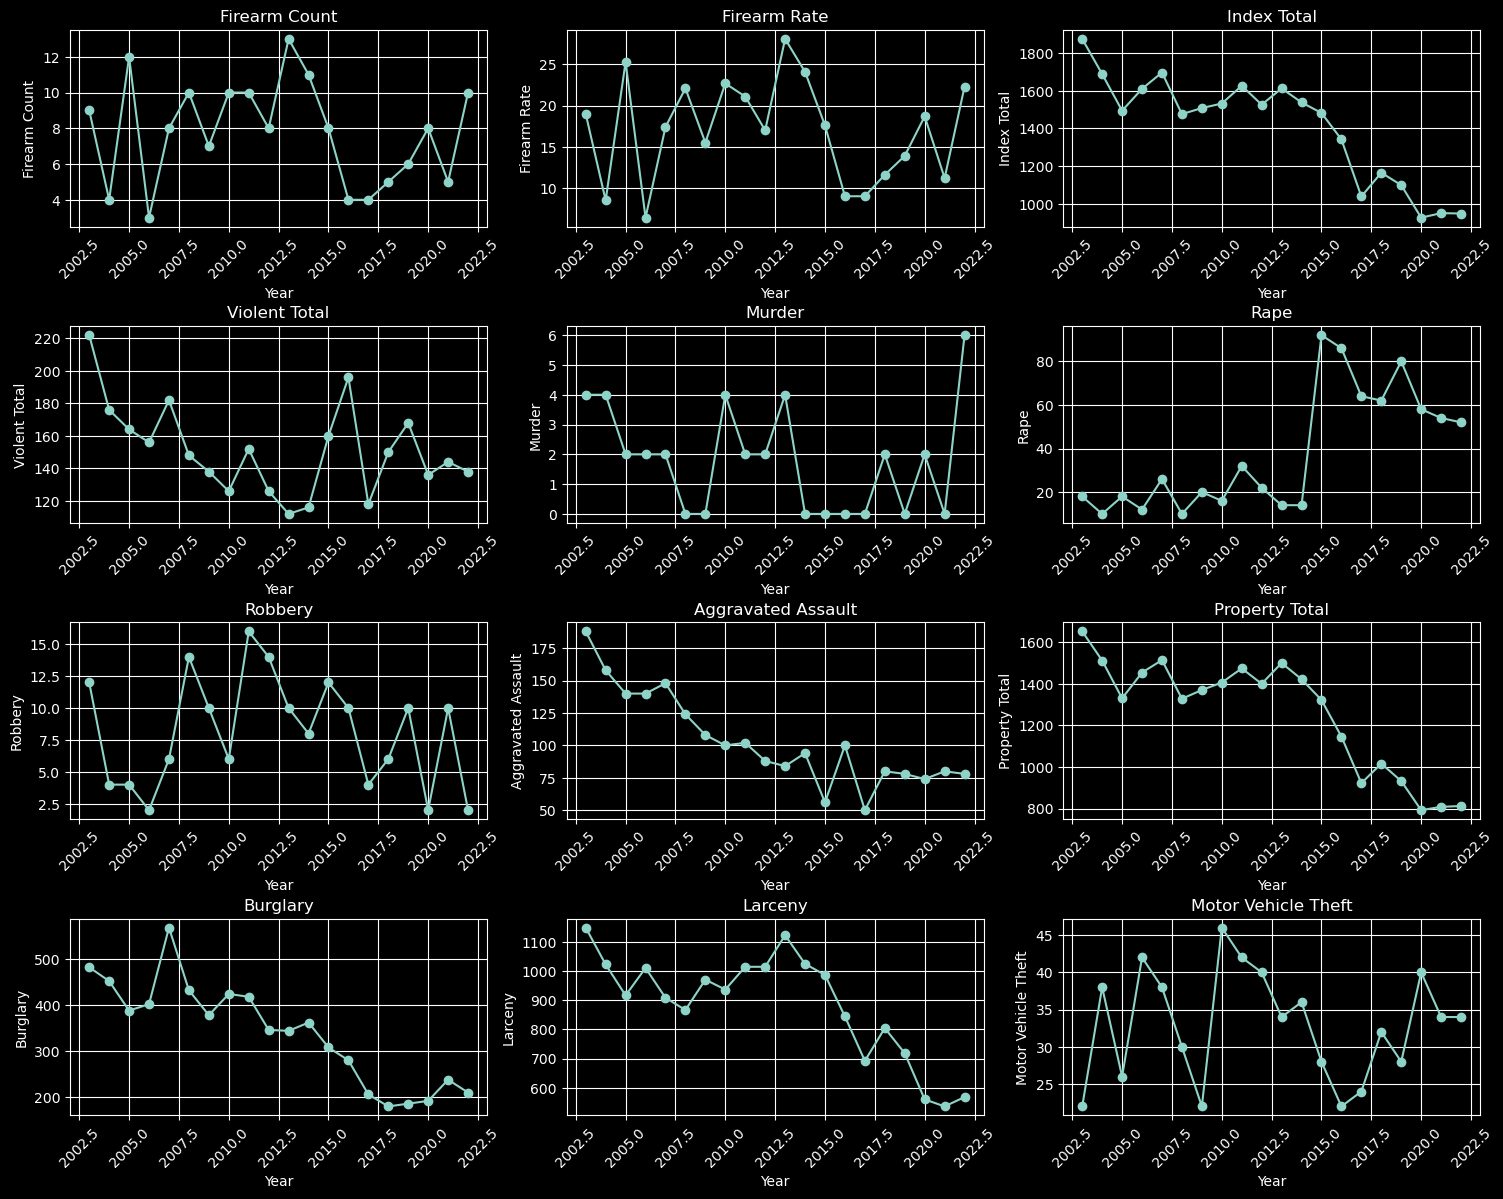

In [15]:
display_features_by_County('Delaware')

In [16]:
# Box plot for Firearm Rate by Year
fig4 = px.box(df, x='Year', y='Firearm Rate', title='Firearm Rate by Year', color='Year', template='plotly_dark')
fig4.update_layout(title_font=dict(size=20), title_x=0.5)
fig4.show()

In [17]:
import plotly.express as px

selected_cols = ['Index Total', 'Violent Total', 'Property Total', 'Burglary', 'Larceny', 'Motor Vehicle Theft']

# Creating box plots for each type of crime by County
for col in selected_cols:
    fig = px.box(df, x='County', y=col, title=f'{col} by County', color='County', template='plotly_dark')
    fig.update_layout(title_font=dict(size=20), title_x=0.5)
    fig.show()
